![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FModel+Monitoring&file=bqml-model-monitoring-introduction.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Model%20Monitoring/bqml-model-monitoring-introduction.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FModel%2520Monitoring%2Fbqml-model-monitoring-introduction.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Model%20Monitoring/bqml-model-monitoring-introduction.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Model%20Monitoring/bqml-model-monitoring-introduction.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# BigQuery ML (BQML) - Model Monitoring Introduction

This is an introduction to model monitoring with BigQuery that accompanies the [blog announcing these features](link here).  You may also want to continue on to the in-depth tutorial that accompanies this introduction: ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb).

This notebook provides a hands-on introduction to [model monitoring with BigQuery ML](https://cloud.google.com/bigquery/docs/model-monitoring-overview). It guides you through the process of training a model, and then implementing monitoring techniques to detect data skew and drift.  An example of automating model monitoring with alerts and retraining is included.

**Key Features Explored:**

* **Data Understanding with [`ML.DESCRIBE_DATA`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-describe-data):** Analyze the distribution of values in your dataset to identify potential issues and inform feature engineering decisions.
* **Model Training with `CREATE MODEL`:** Train a machine learning model directly in BigQuery using the `CREATE MODEL` statement.
* **Monitoring Skew with [`ML.VALIDATE_DATA_SKEW`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-skew):** Compare the distribution of your serving data to the training data to detect potential data skew.
* **Monitoring Drift with [`ML.VALIDATE_DATA_DRIFT`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-drift):** Compare the distribution of your serving data over time to detect potential data drift.
* **TensorFlow Data Validation (TFDV) Integration:** Leverage the power of TFDV within BigQuery to generate descriptive statistics and visualize anomalies using [`ML.TFDV_DESCRIBE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-describe) and [`ML.TFDV_VALIDATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-validate).
* **Continuous Monitoring Job:** Build a BigQuery SQL job that automates the monitoring process and triggers retraining actions when necessary.

**Benefits of Using BigQuery ML Model Monitoring:**

* **Early Detection of Issues:** Identify potential problems with your model's performance before they impact your business.
* **Improved Model Accuracy:** Ensure your model remains accurate over time by detecting and addressing data skew and drift.
* **Reduced Operational Costs:** Automate the monitoring process to save time and resources.
* **Enhanced Decision-Making:** Gain insights into how your data is changing and make informed decisions about model retraining and deployment.

**Target Audience:**

This notebook is designed for data scientists, machine learning engineers, and anyone interested in learning about [model monitoring with BigQuery ML](https://cloud.google.com/bigquery/docs/model-monitoring-overview).

**Getting Started:**

To get started, you will need a [Google Cloud Platform](https:/cloud.google.com) account and a basic understanding of [BigQuery](https://cloud.google.com/bigquery) and SQL. 

**Additional Resources:**

* [BigQuery ML Documentation](https://cloud.google.com/bigquery-ml/docs/)
* [BigQuery ML Model Monitoring](https://cloud.google.com/bigquery/docs/model-monitoring-overview)
    - [`ML.DESCRIBE_DATA`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-describe-data)
    - [`ML.VALIDATE_DATA_SKEW`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-skew)
    - [`ML.VALIDATE_DATA_DRIFT`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-drift)
    - [`ML.TFDV_DESCRIBE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-describe)
    - [`ML.TFDV_VALIDATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-validate)

**Summary:**

BigQuery ML model monitoring provides a powerful and efficient way to ensure the ongoing performance and accuracy of your machine learning models. By leveraging the techniques and tools covered in this notebook, you can gain valuable insights into your data, detect potential issues early on, and take corrective actions to maintain the effectiveness of your models over time.


---
## Colab Setup

When running this notebook in [Colab](https://colab.google/) or [Colab Enterprise](https://cloud.google.com/colab/docs/introduction), this section will authenticate to GCP (follow prompts in the popup) and set the current project for the session.

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    from google.colab import auth
    auth.authenticate_user(project_id = PROJECT_ID)
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [3]:
# tuples of (import name, install name, min_version)
packages = [
    ('tensorflow_data_validation', 'tensorflow-data-validation'),
    ('tensorflow_metadata', 'tensorflow-metadata'),
    ('google.cloud.bigquery', 'google-cloud-bigquery')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### Restart Kernel (If Installs Occured)
After a kernel restart the code submission can start with the next cell after this one.

In [4]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

---
## Setup

Packages:

In [5]:
import json

Clients:

In [6]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


Prepare the code below for your environment.

This notebook takes advantage of the [BigQuery IPython magic](https://cloud.google.com/python/docs/reference/bigquery/latest/magics) for legibility and ease of copy/pasting to BigQuery SQL editor.  If this notebook is being used from an environment that can run notebooks it needs further preparation: Colab, Colab Enterprise, Vertex AI Workbench Instances, or BigQuery Studio with a Python Notebook.  The SQL code in these cells uses the fully qualified [BigQuery table](https://cloud.google.com/bigquery/docs/tables-intro) names in the form `projectname.datasetname.tablename`.  Prepare for your environment by:
- Edit > Find
    - Find: `statmike-mlops-349915`
    - Replace: `<your project id>`
    - Replace All

---
## BigQuery Source Data

This project will uses the following data source as a tutorial.  It is good for examples like this because it is small, has few columns, but contains categorial and numerical data types.

The source table is a BigQuery Public Dataset table.  The following cell uses the [BigQuery IPython magic](https://cloud.google.com/python/docs/reference/bigquery/latest/magics) to retrieve 5 rows of the table for review.  This data is known as [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/) data: 

```
@Manual{,
  title = {palmerpenguins: Palmer Archipelago (Antarctica) penguin data},
  author = {Allison Marie Horst and Alison Presmanes Hill and Kristen B Gorman},
  year = {2020},
  note = {R package version 0.1.0},
  doi = {10.5281/zenodo.3960218},
  url = {https://allisonhorst.github.io/palmerpenguins/},
}
```


There are 334 observations of 4 numerical features (culman length, culmen depth, flipper length, body mass) and 2  categorical features (island, sex) that represent 3 species of penguins.

In [7]:
%%bigquery
SELECT *
FROM `bigquery-public-data.ml_datasets.penguins`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Dream,36.6,18.4,184.0,3475.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Dream,39.8,19.1,184.0,4650.0,MALE
2,Adelie Penguin (Pygoscelis adeliae),Dream,40.9,18.9,184.0,3900.0,MALE
3,Chinstrap penguin (Pygoscelis antarctica),Dream,46.5,17.9,192.0,3500.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Dream,37.3,16.8,192.0,3000.0,FEMALE


---
## **Goal: Train, Serve, And Monitor A Model**

**Train A Model**

In this workflow our goal is to train and operationalize a machine leanring model that can classify unidentified penguins into the correct `species` using only measurements (`culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`), location (`island`) and gender (`sex`).  That means serving predictions, monitoring features, and potentially retraining the model.

**Operationalize The Model**

Taking a trained model to production introduces challenges. The model needs to be regularly evaluated to understand it's performance once put into production. This can be challenging as actual values used to assess the accuracy of predictions may arrive later than the predictions. Continuous monitoring bridges this gap with early signals in two key ways. First, monitoring the distributions of each of the models features for shift (called **skew**) from the training data to the current data. Then, also monitoring for any gradual **drift** in the distribution over time. Setting thresholds and getting alerts for features on each of this distribution changes gives early signals that the model needs to be carefully considered for evaluation and re-training to ensure effectiveness. If the evaluation can be automated then this can even extend to **continuous training**. 

---
## Data Preparation

### Understand The Data Source With `ML.DESCRIBE_DATA`

Reviewing a few records, like above, gives a good sense of how the data is arranged. Before proceeding with machine learning techniques it is important to understand more about these raw columns.  Are they ready to use a features in a model or is some form of feature engineering needed first?  For this, the distribution of values is an important starting point.  

While SQL could be used to look at the distribution, it would be a time consuming process and requires different techniques for different data types like numerical, string, boolean, dates, times, array and struct version of these, and arrays of structs.

To make this process fast and simple, the new [`ML.DESCRIBE_DATA`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-describe-data) function is used to get a single row for each column the describes the data distribution:
- `top_k`: get the top 3 most frequent categories for string columns (default = 1)
- `num_quantiles`: get 4 quantiles for numerical columns (default = 2)

In [8]:
%%bigquery
SELECT *
FROM ML.DESCRIBE_DATA(
  TABLE `bigquery-public-data.ml_datasets.penguins`,
    STRUCT(3 AS top_k, 4 AS num_quantiles)
)

Query is running:   0%|          |

Downloading:   0%|          |

,name,num_rows,num_nulls,num_zeros,min,max,mean,stddev,median,quantiles,unique,avg_string_length,num_values,top_values,min_array_length,max_array_length,avg_array_length,total_array_length,array_length_quantiles,dimension
0,body_mass_g,344,2,0,2700,6300,4201.754386,800.781229,4050.0,"[2700.0, 3550.0, 4050.0, 4750.0, 6300.0]",<NA>,NaN,342,[],<NA>,<NA>,NaN,<NA>,[],<NA>
1,culmen_depth_mm,344,2,0,13.1,21.5,17.151170,1.971904,17.3,"[13.1, 15.6, 17.3, 18.7, 21.5]",<NA>,NaN,342,[],<NA>,<NA>,NaN,<NA>,[],<NA>
2,culmen_length_mm,344,2,0,32.1,59.6,43.921930,5.451596,44.4,"[32.1, 39.2, 44.4, 48.5, 59.6]",<NA>,NaN,342,[],<NA>,<NA>,NaN,<NA>,[],<NA>
3,flipper_length_mm,344,2,0,172,231,200.915205,14.041141,197.0,"[172.0, 190.0, 197.0, 213.0, 231.0]",<NA>,NaN,342,[],<NA>,<NA>,NaN,<NA>,[],<NA>
4,island,344,0,<NA>,Biscoe,Torgersen,NaN,NaN,NaN,[],3,6.093023,344,"[{'value': 'Biscoe', 'count': 168}, {'value': ...",<NA>,<NA>,NaN,<NA>,[],<NA>
5,sex,344,10,<NA>,.,MALE,NaN,NaN,NaN,[],3,4.979042,334,"[{'value': 'MALE', 'count': 168}, {'value': 'F...",<NA>,<NA>,NaN,<NA>,[],<NA>
6,species,344,0,<NA>,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN,[],3,35.465116,344,[{'value': 'Adelie Penguin (Pygoscelis adeliae...,<NA>,<NA>,NaN,<NA>,[],<NA>


Some observations:
- All columns have `num_rows` and `num_nulls`
- Numerical columns have `min`, `max`, `stddev`, `median`, and `quantiles` showing the distribution of the data in the column
- Categorical (string) columns have `min`, `max` values representing the class levels and a `unique` column show how many class levels

Data quality observation:
- The column `sex` has both missing values (10 indicated in `num_nulls`) as well as a `min` values of `.`.  This appears to be a data quality issue that needs fixing.

### Create A BigQuery Dataset

Create a new [BigQuery Dataset](https://cloud.google.com/bigquery/docs/datasets) as a working location for this workflow:

In [9]:
%%bigquery
CREATE SCHEMA IF NOT EXISTS `statmike-mlops-349915.bqml_model_monitoring`
    OPTIONS(
        location = 'US'
    )

Query is running:   0%|          |

""


### Prepare The Source Data

Make a copy of the table source in the new BigQuery dataset with fixes applied to the data quality issue identified for the `sex` column with values of `.`.

> Note: A copy is being made in this case because the source project is `bigquery-public` which is not editable.

In [10]:
%%bigquery
CREATE OR REPLACE TABLE `statmike-mlops-349915.bqml_model_monitoring.training` AS
    SELECT * EXCEPT(sex),
        CASE WHEN sex = '.' THEN NULL ELSE sex END AS sex
    FROM `bigquery-public-data.ml_datasets.penguins`

Query is running:   0%|          |

""


---
## Model Training

In [11]:
%%bigquery
CREATE OR REPLACE MODEL `statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic`
    TRANSFORM(
        ML.ROBUST_SCALER(body_mass_g) OVER() AS body_mass_g,
        ML.STANDARD_SCALER(culmen_length_mm) OVER() AS culmen_length_mm,
        ML.STANDARD_SCALER(culmen_depth_mm) OVER() AS culmen_depth_mm,
        ML.QUANTILE_BUCKETIZE(flipper_length_mm, 3) OVER() AS flipper_length_mm,
        ML.IMPUTER(sex, 'most_frequent') OVER() AS sex,
        ML.IMPUTER(island, 'most_frequent') OVER() AS island,
        species
    )
    OPTIONS(
        MODEL_TYPE = 'LOGISTIC_REG',
        INPUT_LABEL_COLS = ['species'],
        
        # data specifics
        DATA_SPLIT_METHOD = 'AUTO_SPLIT',
        
        # model specifics
        AUTO_CLASS_WEIGHTS = TRUE
    )
AS
    SELECT *
    FROM `statmike-mlops-349915.bqml_model_monitoring.training`

Query is running:   0%|          |

""


### Create/Train A Model

Create a model trained to classify `species` for the traning records.  Here, directly in BigQuery, the [`CREATE MODEL` statement for generalized linear models models](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-glm) is used.  This uses the `TRANSFORM` clause within the model to embed user specified transfomations within the model for use during serving and model monitoring which will both be show later in this introduction.


> **Note:** The ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb) includes training a random forest.

From reviewing the training data above, the following transformations will be tried:
- Apply [`ML.ROBUST_SCALER`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-robust-scaler) to `body_mass_g`
- Apply [`ML.STANDARD_SCALER`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-standard-scaler) to `culmen_depth_mm` and `culmen_length_mm`
- Apply [`ML.QUANTILE_BUCKATIZE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-quantile-bucketize) to `flipper_length_mm`
- Apply [`ML.IMPUTER`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-imputer) to `island`, and `sex`

In [12]:
%%bigquery history
SELECT *
FROM ML.TRAINING_INFO(MODEL `statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic`)
ORDER BY iteration

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='iteration'>

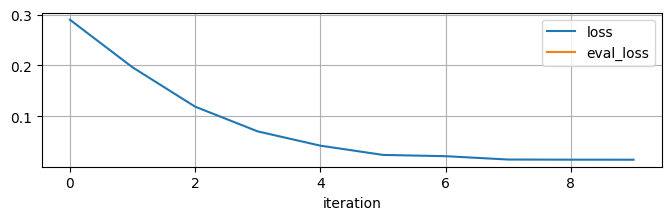

In [13]:
history.plot(x = 'iteration', y = ['loss','eval_loss'], figsize = (8, 2), grid = True)

This model training could be followed by evaluation and prediction tasks using the many helpful BigQuery ML functions.  To learn more about these check out the [End-to-end user journey for each model](https://cloud.google.com/bigquery/docs/e2e-journey) type.

---
## Serving Data

The data source for training and evaluation represents what is known about a system at a point-in-time.  In real world systems measurements can change for many reasons, for example:
- training/serving skew due to measurement and data systems:
    - the tool used for measurement may change resulting is slight shifts and variations
    - the system reporting results might be updated and introduce errors like rearranging the order or parameters and format of the results
    - the data processing systems might have changes that alter the calculations of measurements
- the system, environment, or subjects being measured may:
    - change behaviors
    - short-term even forces change
    - have environmental changes that impact them
    - have seasonal changes that were not represented in the training data
    - change in general due to upstream causes

### Introduce Changes Over Time

To illustrate the impact of change over time, the following code creates a new set of data from a 20% sample of the training data.  It creates a series of changes to measurements for each of the past 30 days.  In each case, the values of the parameters `flipper_length_mm` and `body_mass_g` are allowed to slightly increase which can accumulate over the timespan. This might mimic a potential growth season for the penguins that might not have been represented in the training data.

This table of serving data could be sourced form where your features are coming from.  In the case of an online model, like [Vertex AI Prediction Endpoints](https://cloud.google.com/vertex-ai/docs/predictions/overview), then [prediction request could be logged to BigQuery](https://cloud.google.com/vertex-ai/docs/predictions/online-prediction-logging#enabling-and-disabling) for use in the model monitoring tasks below.  This pattern is also covered in the accompanying ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb).

In [14]:
%%bigquery
DECLARE counter INT64 DEFAULT 30;

# actual data as starting point - add entity_id, and feature_timestamp:
CREATE OR REPLACE TABLE `statmike-mlops-349915.bqml_model_monitoring.serving` AS
    SELECT * EXCEPT(flipper_length_mm, body_mass_g),
    TIMESTAMP_SUB(TIMESTAMP(CURRENT_DATE()), INTERVAL counter DAY) AS instance_timestamp,
    flipper_length_mm as flipper_length_mm,
    body_mass_g as body_mass_g
    FROM `statmike-mlops-349915.bqml_model_monitoring.training`
    WHERE RAND() <= 0.20;

LOOP
    SET counter = counter - 1;
    IF counter < 0 THEN LEAVE;
    END IF;
    INSERT `statmike-mlops-349915.bqml_model_monitoring.serving`
        SELECT * EXCEPT(instance_timestamp, flipper_length_mm, body_mass_g),
            TIMESTAMP_ADD(instance_timestamp, INTERVAL 1 DAY) AS instance_timestamp,
            CASE
                WHEN RAND() >= 0.75 THEN flipper_length_mm
                ELSE flipper_length_mm + 6*(RAND()-0.1)
            END AS flipper_length_mm,
            CASE
                WHEN RAND() >= 0.75 THEN body_mass_g
                ELSE body_mass_g + 120*(RAND()-0.1)
            END AS body_mass_g,
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE instance_timestamp >= (SELECT MAX(instance_timestamp) FROM `statmike-mlops-349915.bqml_model_monitoring.serving`);
END LOOP;

Query is running:   0%|          |

""


In [15]:
%%bigquery serve
SELECT
    DATE(instance_timestamp) AS DATE,
    AVG(flipper_length_mm) AS flipper_length_mm,
    AVG(body_mass_g) AS body_mass_g
FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
GROUP BY DATE
ORDER BY DATE

Query is running:   0%|          |

Downloading:   0%|          |

In [16]:
serve.set_index('DATE', inplace = True)

<Axes: xlabel='DATE'>

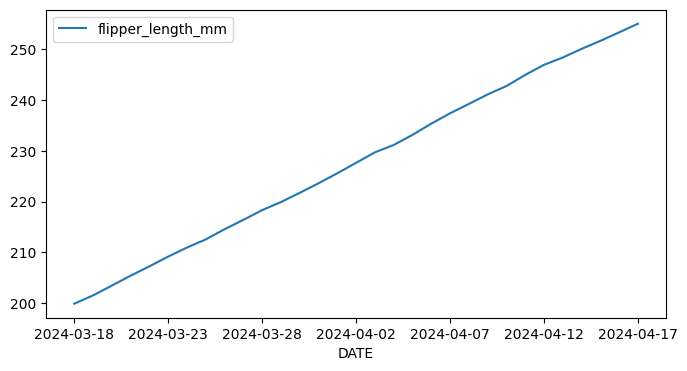

In [17]:
serve['flipper_length_mm'].plot(legend = True, figsize = (8, 4))

<Axes: xlabel='DATE'>

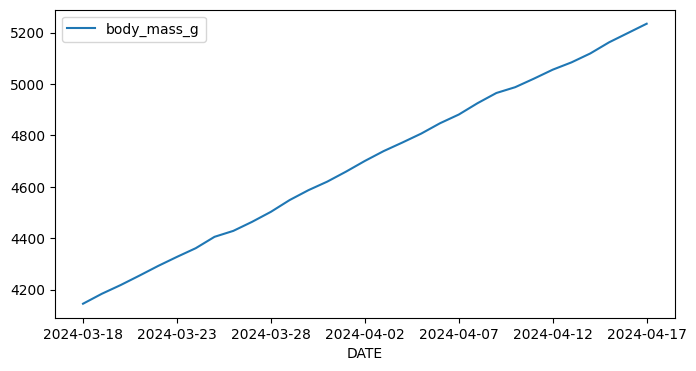

In [18]:
serve['body_mass_g'].plot(legend = True, figsize = (8, 4))

---
## Model Monitoring

Reviewing model evaluations over time does show a pattern of deterioration in the example above.  But at what point is it actionable?  And what if each days evaluations are relying on actual values that took hours, days, weeks, or even months to be available?  

Model monitoring takes a different approach.  It goes back to the source of the model, the input features.  These features formed a distribution at the input to the model (the training data) and this can be used to compare to over time.  By setting thresholds on these comparisons to the original training data, alerts can be used to notify that a models accuracy could be in question.  This comparison to the training data is called **skew** detection.

Similarly, each days values could be compared to the previous days, or weeks values.  These comparisons are referred to as **drift** detection.  

Both of these types of comparisons can be done directly in BigQuery with two functions built for these tasks:
- [`ML.VALIDATE_DATA_SKEW`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-skew)
- [`ML.VALIDATE_DATA_DRIFT`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-drift)

**NOTE:** To understand more about the metrics used for monitoring check out the accompanying ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb) for this introduction.

### Monitoring Skew (Change from training) With `ML.VALIDATE_DATA_SKEW`

Compare today, or any data, to the training data by directly comparing to the the model created in BigQuery.

In [19]:
%%bigquery
SELECT *
FROM ML.VALIDATE_DATA_SKEW(
    MODEL `statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic`,
    (
        SELECT *
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE DATE(instance_timestamp) = CURRENT_DATE()
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

,input,metric,threshold,value,is_anomaly
0,body_mass_g,JENSEN_SHANNON_DIVERGENCE,0.3,0.291698,False
1,culmen_depth_mm,JENSEN_SHANNON_DIVERGENCE,0.3,0.055952,False
2,culmen_length_mm,JENSEN_SHANNON_DIVERGENCE,0.3,0.050380,False
3,flipper_length_mm,JENSEN_SHANNON_DIVERGENCE,0.3,0.936299,True
4,island,L_INFTY,0.3,0.048837,False
5,sex,L_INFTY,0.3,0.020634,False


### Monitoring Drift (Change Over Time) With `ML.VALIDATE_DATA_DRIFT`

Compare last 5 days to prior 5 days and set the a lower, more sensitive, threshold of `0.03` (default is `0.3`) for all features.

In [21]:
%%bigquery
SELECT *
FROM ML.VALIDATE_DATA_DRIFT(
    (
        SELECT * EXCEPT(species, instance_timestamp)
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE DATE(instance_timestamp) >= DATE_SUB(CURRENT_DATE(), INTERVAL 5 DAY)
    ),
    (
        SELECT * EXCEPT(species, instance_timestamp)
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE DATE(instance_timestamp) >= DATE_SUB(CURRENT_DATE(), INTERVAL 10 DAY)
            AND DATE(instance_timestamp) < DATE_SUB(CURRENT_DATE(), INTERVAL 5 DAY)
    ),
    STRUCT(
        0.03 AS categorical_default_threshold,
        0.03 AS numerical_default_threshold
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

,input,metric,threshold,value,is_anomaly
0,body_mass_g,JENSEN_SHANNON_DIVERGENCE,0.03,7.782686e-02,True
1,culmen_depth_mm,JENSEN_SHANNON_DIVERGENCE,0.03,7.987249e-17,False
2,culmen_length_mm,JENSEN_SHANNON_DIVERGENCE,0.03,2.518705e-17,False
3,flipper_length_mm,JENSEN_SHANNON_DIVERGENCE,0.03,8.444239e-02,True
4,island,L_INFTY,0.03,0.000000e+00,False
5,sex,L_INFTY,0.03,0.000000e+00,False


---
### TensorFlow Data Validation (TFDV) In BigQuery

BigQuery offers two functions that bring the power of the TensorFlow's [TFX platform](https://www.tensorflow.org/tfx) with built-in [TensorFlow Data Validation (TFDV)](https://www.tensorflow.org/tfx/data_validation/get_started) module directly inside of BigQuery.
- [`ML.TFDV_DESCRIBE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-describe) to generate descriptive statistics of any table
- [`ML.TFDV_VALIDATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-validate) to compare statistics of two tables

#### Generate Statistics with `ML.TFDV_DESCRIBE`

Generate statistics for any table, in this case the training data features or a timespan of serving data features.  This is like using the TensorFlow's [TFX platform](https://www.tensorflow.org/tfx) with built-in [TensorFlow Data Validation (TFDV)](https://www.tensorflow.org/tfx/data_validation/get_started) module's [`tfdv.generate_statistics_from_csv()`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/generate_statistics_from_csv) method.

The descriptions can be used in comparisons for skew or drift detection with the `ML.TFDV_VALIDATE` function, covered next, as well as in the visualization tool `tfdv.visualize_statistics` also covered below.

In [22]:
%%bigquery train_describe
SELECT *
FROM ML.TFDV_DESCRIBE(
    (
        SELECT * EXCEPT(species)
        FROM `statmike-mlops-349915.bqml_model_monitoring.training`
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

In [23]:
train_describe = json.loads(train_describe['dataset_feature_statistics_list'].iloc[0])

In [24]:
train_describe['datasets'][0]['features'][0]

{'name': 'body_mass_g',
 'num_stats': {'common_stats': {'avg_num_values': 1,
   'max_num_values': '1',
   'min_num_values': '1',
   'num_non_missing': '342',
   'num_values_histogram': {'buckets': [{'high_value': 1,
      'low_value': 1,
      'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4},
     {'high_value': 1, 'low_value': 1, 'sample_count': 34.4}],
    'type': 'QUANTILES'},
   'tot_num_values': '342'},
  'histograms': [{'buckets': [{'high_value': 3300,
      'low_value': 2700,
      'sample_count': 34.4},
     {'high_va

In [25]:
%%bigquery today_describe
SELECT *
FROM ML.TFDV_DESCRIBE(
    (
        SELECT * EXCEPT(species, instance_timestamp)
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE DATE(instance_timestamp) = CURRENT_DATE()
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

In [26]:
today_describe = json.loads(today_describe['dataset_feature_statistics_list'].iloc[0])

In [27]:
#today_describe['datasets'][0]['features'][0]

#### Visualize Statistics with `tfdv.visualize_statistics`

Use the [`tfdv.visualize_statistics`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/visualize_statistics) tool to visualize the generated descriptions and directly compare them.  This presents visuals using [Facets Overview](https://pair-code.github.io/facets/).

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow_data_validation as tfdv
import tensorflow_metadata as tfmd
from google.protobuf import json_format

In [29]:
tfdv.visualize_statistics(
    lhs_statistics = json_format.ParseDict(train_describe, tfmd.proto.statistics_pb2.DatasetFeatureStatisticsList()),
    rhs_statistics = json_format.ParseDict(today_describe, tfmd.proto.statistics_pb2.DatasetFeatureStatisticsList()),
    lhs_name = 'Training Data Stats',
    rhs_name = 'Serving Data Stats - For Today'
)

#### Compare And Detect Anomalies with `ML.TFDV_VALIDATE`

Compare the distribution of any table to a base table and compute distance statistics to detect anomalies.  This is like using the TensorFlow's [TFX platform](https://www.tensorflow.org/tfx) with built-in [TensorFlow Data Validation (TFDV)](https://www.tensorflow.org/tfx/data_validation/get_started) module's [validate_statistics api](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/validate_statistics).

These comparison can be made to training data for **skew** detection or previous serving data for **drift** detection.

In [30]:
%%bigquery validate
WITH
    TRAIN AS (
        SELECT * EXCEPT(species)
        FROM `statmike-mlops-349915.bqml_model_monitoring.training`
    ),
    SERVE AS (
        SELECT * EXCEPT(species, instance_timestamp)
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        WHERE DATE(instance_timestamp) = CURRENT_DATE()
    )
SELECT ML.TFDV_VALIDATE(
    (SELECT * FROM ML.TFDV_DESCRIBE(TABLE TRAIN)),
    (SELECT * FROM ML.TFDV_DESCRIBE(TABLE SERVE)),
    'SKEW', 0.03,'L_INFTY',0.03
) as validate

Query is running:   0%|          |

Downloading:   0%|          |

In [31]:
validate = json.loads(validate['validate'].iloc[0])

In [32]:
#validate

#### Display Anomalies with `tfdv.display_anomalies`

Use the [`tfdv.display_anomalies`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/display_anomalies) tool to display a table of anomaly detections with descriptions.

In [33]:
if 'generate_legacy_feature_spec' in validate['baseline'].keys():
    del validate['baseline']['generate_legacy_feature_spec']

In [34]:
tfdv.display_anomalies(
    anomalies = json_format.ParseDict(validate, tfmd.proto.anomalies_pb2.Anomalies())
)

,Anomaly short description,Anomaly long description
Feature name,,
'body_mass_g',High approximate Jensen-Shannon divergence between training and serving,"The approximate Jensen-Shannon divergence between training and serving is 0.291698 (up to six significant digits), above the threshold 0.03."
'culmen_depth_mm',High approximate Jensen-Shannon divergence between training and serving,"The approximate Jensen-Shannon divergence between training and serving is 0.0559515 (up to six significant digits), above the threshold 0.03."
'culmen_length_mm',High approximate Jensen-Shannon divergence between training and serving,"The approximate Jensen-Shannon divergence between training and serving is 0.0503798 (up to six significant digits), above the threshold 0.03."
'island',High Linfty distance between training and serving,"The Linfty distance between training and serving is 0.0488372 (up to six significant digits), above the threshold 0.03. The feature value with maximum difference is: Torgersen"
'flipper_length_mm',High approximate Jensen-Shannon divergence between training and serving,"The approximate Jensen-Shannon divergence between training and serving is 0.936299 (up to six significant digits), above the threshold 0.03."


---
## Continous Monitoring

The methods above can be combined into a job that runs both skew and drift detection.  The jobs can be scheduled or triggered to make the process of model monitoring continous - continous monitoring.  If the model quality can be evaluated with confidence then the automation can even be extended to retrain and update the model for continous training.  

This section shows one of many ways to create a model monitoring job. For models created in BigQuery with BigQuery ML it also shows a retraining action as part of the job when alerts are detected.

These types of jobs could be automated for continous monitoring.  In the accompanying ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb) the approaches to automation are discussed in more detail and the jobs is expanded with more detailed tasks and logic:
- [BigQuery Scheduled Queries](https://cloud.google.com/bigquery/docs/scheduling-queries)
- [Dataform](https://cloud.google.com/dataform/docs/quickstart-create-workflow)
- [Workflows](https://cloud.google.com/workflows/docs/tutorials/bigquery-parallel-jobs)
- [Cloud Composer](https://cloud.google.com/composer/docs/data-analytics-googlecloud)
- [Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/gcpc-list#bqml_components)

### Model Monitoring Job: With Alerting And Retraining

A BigQuery SQL job that uses the [procedural language](https://cloud.google.com/bigquery/docs/reference/standard-sql/procedural-language) to detect skew and retrain the model with updated training data while also returning an alert message.

This job also includes retraining of the BigQuery ML model:
In this case the example is simplified to retrain the model and directly implement it as a replacement with `CREATE OR REPLACE MODEL`.  In a production enviornment additional pre/post steps might take place as part of this workflow:
- on skew/drift detection:
    - Prior to retraining:
        - ensure detection is not due to data errors, schema changes, or system changes
    - After retrainning:
        - evaluate the model and compare to current production version
        - conditionally deploy the new version if it is better in any/all key metrics
        - consider rollout strategies for the retrained model
        - trigger human review before deployment of the replacement

In [35]:
%%bigquery
DECLARE skew_anomalies ARRAY<STRING>;

# Monitor Skew: first 5 days of sercving compared to training
SET skew_anomalies = (
    SELECT ARRAY_AGG(input)
    FROM ML.VALIDATE_DATA_SKEW(
        MODEL `statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic`,
        (
            SELECT * EXCEPT(species, instance_timestamp)
            FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
        )
    )
    WHERE is_anomaly = True
);

IF(ARRAY_LENGTH(skew_anomalies) > 0) THEN
    # retrain the model
    CREATE OR REPLACE MODEL `statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic`
        TRANSFORM(
            ML.ROBUST_SCALER(body_mass_g) OVER() AS body_mass_g,
            ML.STANDARD_SCALER(culmen_length_mm) OVER() AS culmen_length_mm,
            ML.STANDARD_SCALER(culmen_depth_mm) OVER() AS culmen_depth_mm,
            ML.QUANTILE_BUCKETIZE(flipper_length_mm, 3) OVER() AS flipper_length_mm,
            ML.IMPUTER(sex, 'most_frequent') OVER() AS sex,
            ML.IMPUTER(island, 'most_frequent') OVER() AS island,
            species
        )
        OPTIONS(
            MODEL_TYPE = 'LOGISTIC_REG',
            INPUT_LABEL_COLS = ['species'],

            # data specifics
            DATA_SPLIT_METHOD = 'AUTO_SPLIT',

            # model specifics
            AUTO_CLASS_WEIGHTS = TRUE
        )
    AS
        SELECT species, island, culmen_length_mm, culmen_depth_mm, sex, flipper_length_mm, body_mass_g
        FROM `statmike-mlops-349915.bqml_model_monitoring.training`
        UNION ALL
        SELECT species, island, culmen_length_mm, culmen_depth_mm, sex, flipper_length_mm, body_mass_g
        FROM `statmike-mlops-349915.bqml_model_monitoring.serving`
    ;
    
    # force alert with message
    SELECT ERROR(
        CONCAT(
            '\n\nFound data skew in features: ',
            ARRAY_TO_STRING(skew_anomalies, ', '),
            '. Model is retrained with latest up to date serving data.\n\n'
        )
    );

    ELSE SET skew_anomalies = ['No skew detected.'];
END IF;

Executing query with job ID: b6e61082-93b2-4be5-830d-d5f13a970c2d
Query executing: 148.95s


ERROR:
 400 Query error: 

Found data skew in features: flipper_length_mm. Model is retrained with latest up to date serving data.

 at [47:5]

Location: US
Job ID: b6e61082-93b2-4be5-830d-d5f13a970c2d



---
## More Resources

Continue on to the ['BigQuery ML (BQML) - Model Monitoring Tutorial'](./bqml-model-monitoring-tutorial.ipynb) for a more detailed review of model monitoring with BigQuery. 

Read more about model monitoring in the documentation for the model monitoring functions:
* [BigQuery ML Documentation](https://cloud.google.com/bigquery-ml/docs/)
* [BigQuery ML Model Monitoring](https://cloud.google.com/bigquery/docs/model-monitoring-overview)
    - [`ML.DESCRIBE_DATA`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-describe-data)
    - [`ML.VALIDATE_DATA_SKEW`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-skew)
    - [`ML.VALIDATE_DATA_DRIFT`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-validate-data-drift)
    - [`ML.TFDV_DESCRIBE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-describe)
    - [`ML.TFDV_VALIDATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-tfdv-validate)

---
## Remove Resources Created In This Notebook

All the content is contained within the BigQuery dataset named `bqml_model_monitoring` created above.  If you are continuing on to the tutorial then consider leaving these resources for reuse in that notebook workflow.  

The following will delete the BigQuery resources created above and the dataset if it is empty.

In [37]:
# to remove resources change this flag to True:
remove = False

In [40]:
if remove:
    # client for BigQuery
    from google.cloud import bigquery
    bq = bigquery.Client(project = 'statmike-mlops-349915')
    
    # delete BigQuery table(s) and model(s) created above
    bq.delete_table('statmike-mlops-349915.bqml_model_monitoring.training')
    bq.delete_table('statmike-mlops-349915.bqml_model_monitoring.serving')
    bq.delete_model('statmike-mlops-349915.bqml_model_monitoring.classify_species_logistic')
    
    # delete BigQuery dataset - fails if other content was in the dataset than what this notebook created
    bq.delete_dataset('statmike-mlops-349915.bqml_model_monitoring', delete_contents = False)